#  Gaussian Mixture Probability Hypothesis Density at the Glance

## Inrtroduction of GM-PHD

A Gaussian Mixture Probability Hypothesis Density (GM-PHD) filter is often used in multi-target tracking, where it estimates the number and states of multiple targets based on noisy observations. 
The Probability Hypothesis Density (PHD) filter has been introduced as:
- a powerful the Kalman Filter in multi-object tracking
- with random number of target.
- first-order statistical moment, or PHD, of a multi-target posterior distribution
- comprising true measurements and false alarms

In a GM-PHD filter multiple target posterior distribution will be a Gaussian mixture (GM). Including the following block diagram. 

![block diagram_GMPHD1](../GM_PHD/GMPHD_Image/BlockDiagram_GM_PHD_1.png)

As mentioned above, it is similar to a Kalman filter, consisting of two parts: prediction and updating. However, due to multitarget tracking in noisy clutter, the probability expectation is used, and therefore state extraction with pruning must be added. The dynamic model used is based on the Kalman filter and other state-space models.

Abstracted form of above figure as shown here. Input are random finit set (RFS) of measurements $ Z_k $ and output are RFS of states $ \hat{X}_k$. 

![block diagram_GMPHD1](../GM_PHD/GMPHD_Image/BlockDiagram_GM_PHD_2.png)


**Transition Density:** Given a state : $ p(\mathbf{x}_{k-1}) $ at time :$k-1$, the probability density of a transition to the state :$p(\mathbf{x}_k)$ at time :$k$ is given by :
$f_{k\vert k-1}(\mathbf{x}_{k}\vert \mathbf{x}_{k-1})$

Likelihood Function: Given a state :$\mathbf{x}_{k}$ at time :$k$, the probability density of
  receiving the detection :$\mathbf{z}_{k}$ is given by
  :$g_{k}(\mathbf{z}_{k}\vert \mathbf{x}_{k})$

The Posterior Density: The probability density of state :$\mathbf{x}_{k}$ given all the previous
  observations is denoted by :$p_{k}(\mathbf{x}_{k}\vert \mathbf{z}_{1:k})$. Using an initial density
  :$p_{0}(\cdot)$, we can apply Bayes' recursion to show that the posterior density is actually
  
$$
   p_{k}(\mathbf{x}_{k}\vert \mathbf{z}_{1:k}) = {{g_{k}(\mathbf{z}_{k}\vert \mathbf{x}_{k})p_{k\vert k-1}(\mathbf{x}_{k}\vert \mathbf{z}_{1:k-1})} \over {\int g_{k}(\mathbf{z}_{k}\vert \mathbf{x})p_{k\vert k-1}(\mathbf{x}\vert \mathbf{z}_{1:k-1})d\mathbf{x}}}
$$
 
  It is important to notice here that the state at time :$k$ can be derived wholly by
  the state at time :$k-1$.
 
  Here we also introduce the following notation:
  :$p_{S,k}(\zeta)$ is the probability that a target :$S$ will exist at time :$k$ given that
  its previous state was :$\zeta$
 
  Suppose we have the random finite set :$\mathbf{X}_{k} \in \chi$ corresponding to the set of
  target states at time :$k$ and :$\mathbf{X}_k$ has probability distribution :$P$. Integrating over
  every region :$S \in \chi$, we get a formula for the first order moment (also called the
  intensity) at time :$k$, :$v_{k}$
  
$$
\int \left \vert \mathbf{X}_{k}\cap S\right \vert P(d\mathbf{X}_k)=\int _{S}v_{k}(x)dx.
$$
 
  The set of targets spawned at time :$k$ by a target whose previous state was :$\zeta$ is the
  random finite set :$\mathbf{B}_{k|k-1}$. This new set of targets has intensity denoted :$\beta_{k|k-1}$.
 
  The intensity of the random finite set of births at time :$k$ is given by :$\gamma_{k}$.
 
  The intensity of the random finite set of clutter at time :$k$ is given by :$\kappa_{k}$.
 
  The probability that a state :$x$ will be detected at time :$k$  is given by :$p_{D, k}(x)$.

  %%
  Assumptions
  ^^^^^^^^^^^
  The GM-PHD filter assumes that each target is independent of one another in both generated
  observations and in evolution. Clutter is also assumed to be independent of the target
  measurements. Finally, we assume that the target locations at a given time step are
  dependent on the multi-target prior density, and their distributions are Poisson. Typically,
  the target locations are also dependent on previous measurements, but that has been omitted
  in current GM-PHD algorithms.
 
  Posterior Propagation Formula
  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Under the above assumptions, Vo and Ma [ ]_ proved that the posterior intensity can be
  propagated in time using the PHD recursion as follows:

$$
\begin{align}
v_{k \mid k-1}(x) &= \int p_{S,k}(\zeta) f_{k \mid k-1}(x \mid \zeta) v_{k-1}(\zeta) \, d\zeta \\
& \quad + \int \beta_{k \mid k-1}(x \mid \zeta) v_{k-1}(\zeta) \, d\zeta + \gamma_{k}(x) \\
v_{k}(x) &= \left[ 1 - p_{D,k}(x) \right] v_{k \mid k-1}(x) \\
& \quad + \sum_{z \in Z_{k}} \frac{p_{D,k}(x) g_{k}(z \mid x) v_{k \mid k-1}(x)}{\kappa_{k}(z) + \int p_{D,k}(\xi) g_{k}(z \mid \xi) v_{k \mid k-1}(\xi) \, d\xi}
\end{align}
$$


  For more information about the specific formulas for linear and non-linear Gaussian models,
  please see Vo and Ma's full paper.

  %%
  A Ground-Based Multi-Target Simulation
  --------------------------------------
  This simulation will include several targets moving in different directions accross the 2D
  Cartesian plane. The start locations of each object are random. These start locations are
  called priors and are known to the filter, via the density :$p_{0}(\cdot)$ discussed above.
 
  At each time step, new targets are created and some targets die according to defined
  probabilities.
 



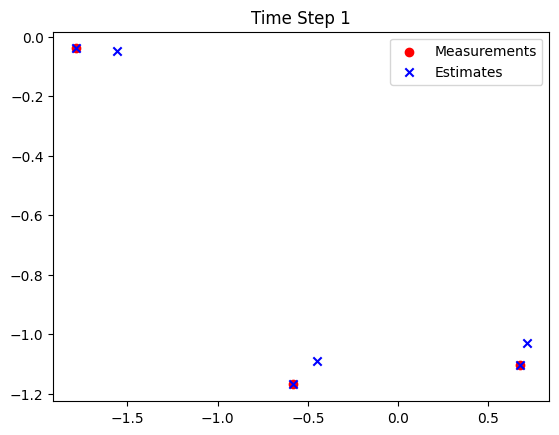

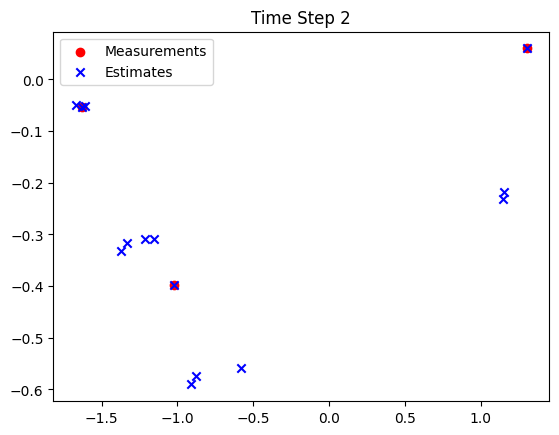

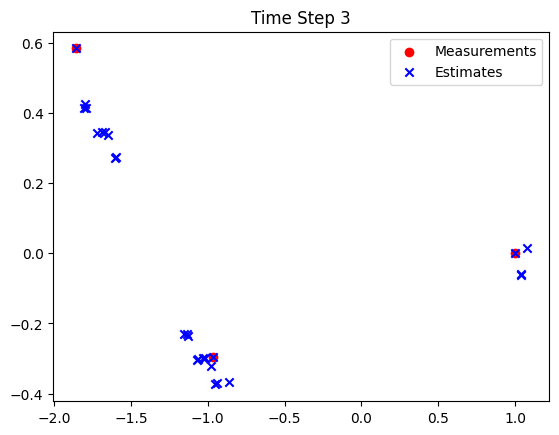

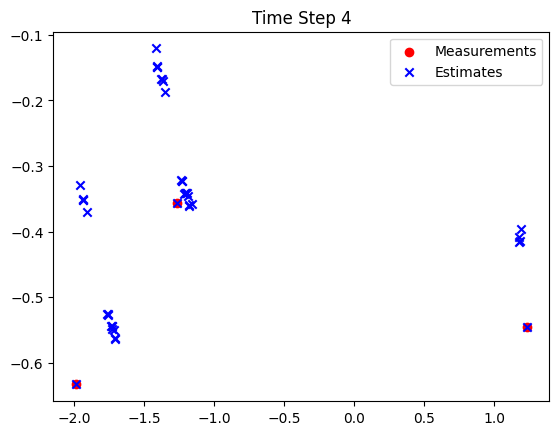

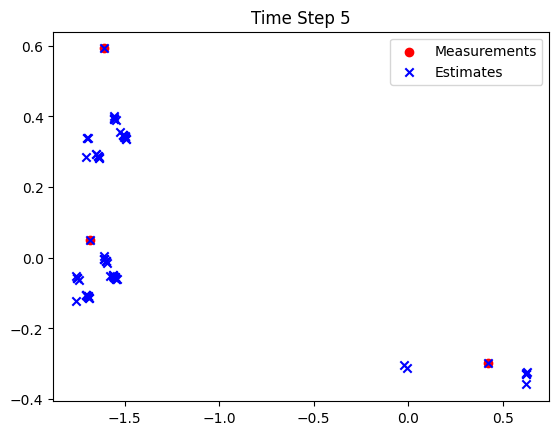

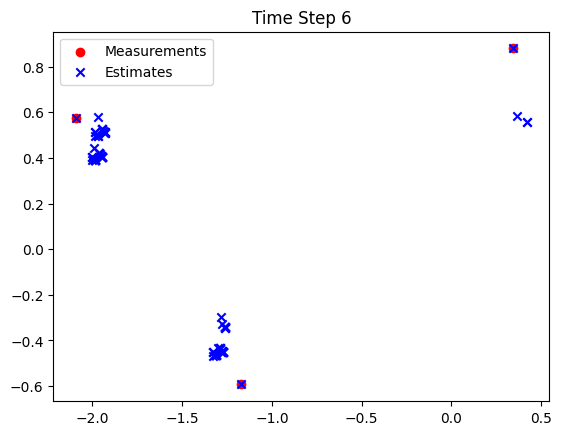

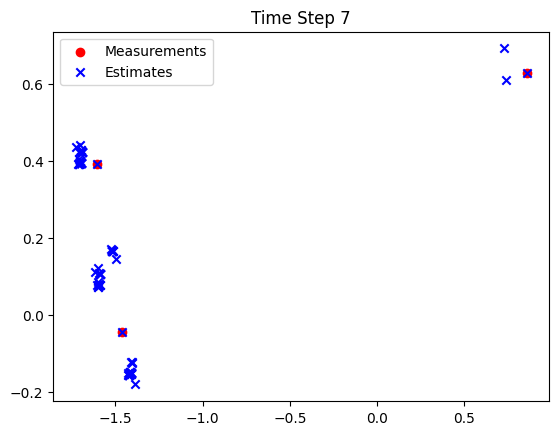

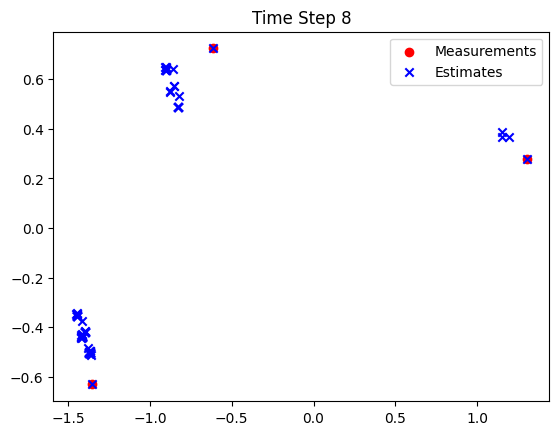

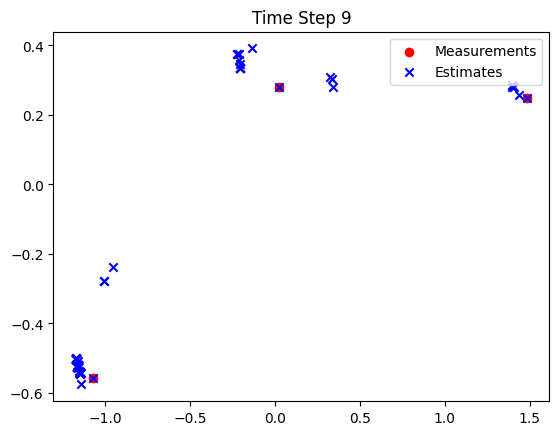

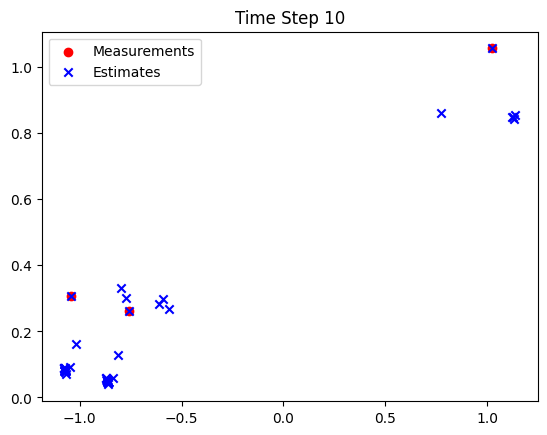

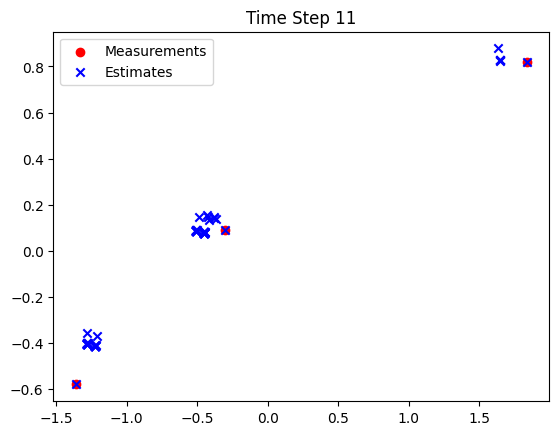

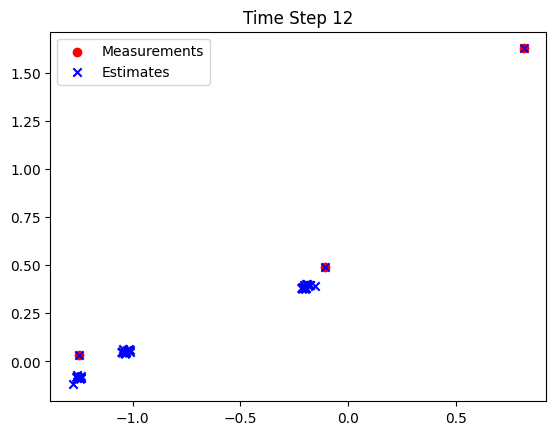

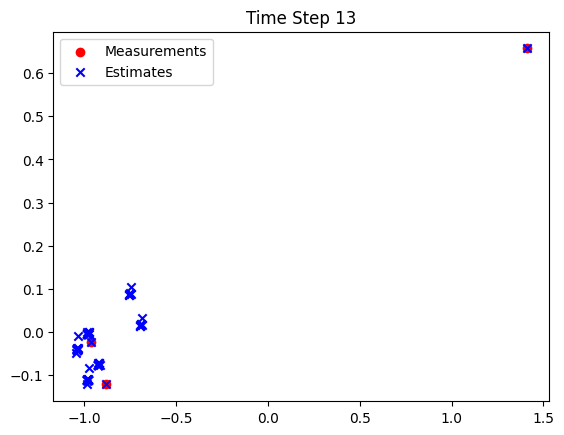

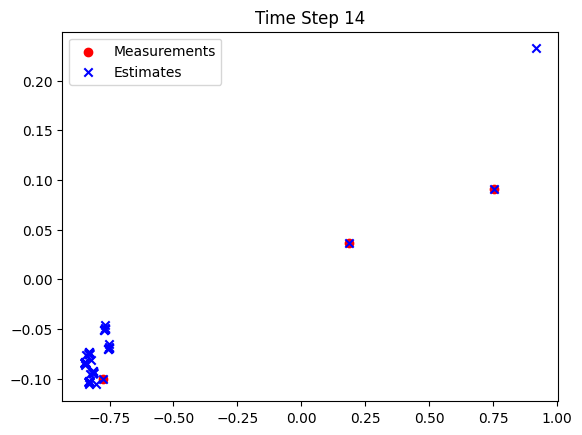

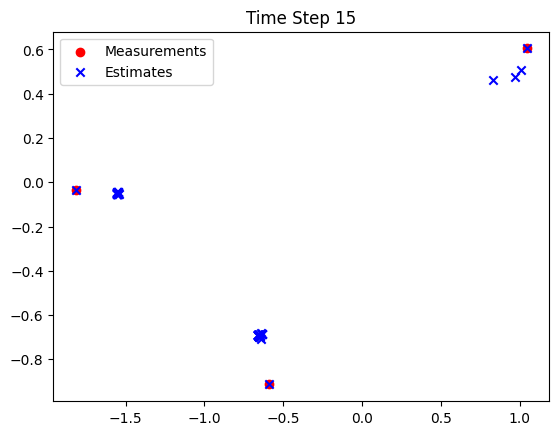

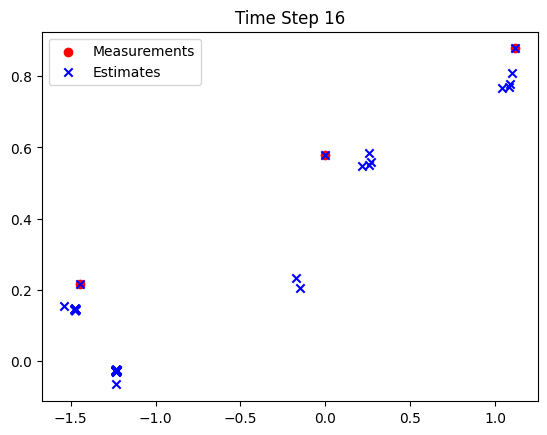

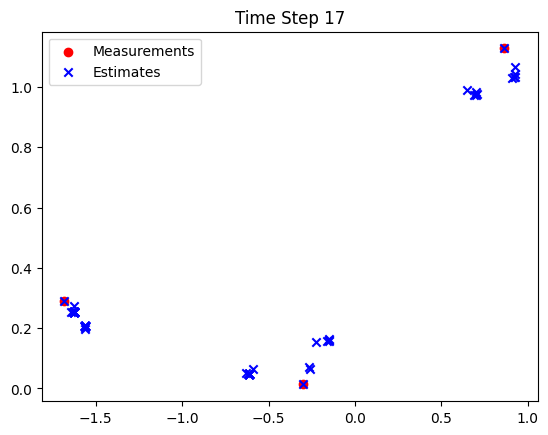

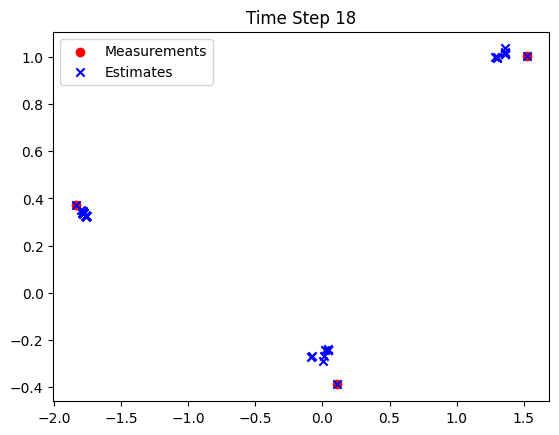

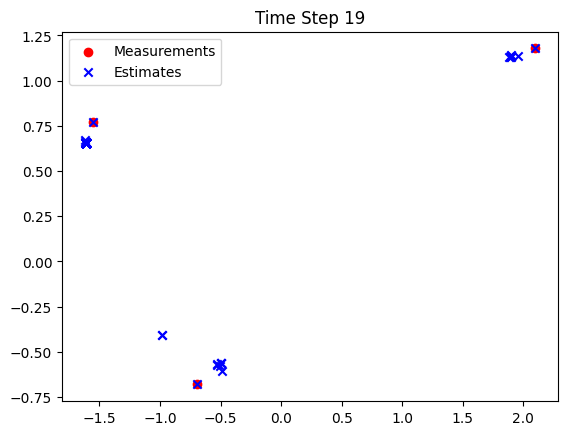

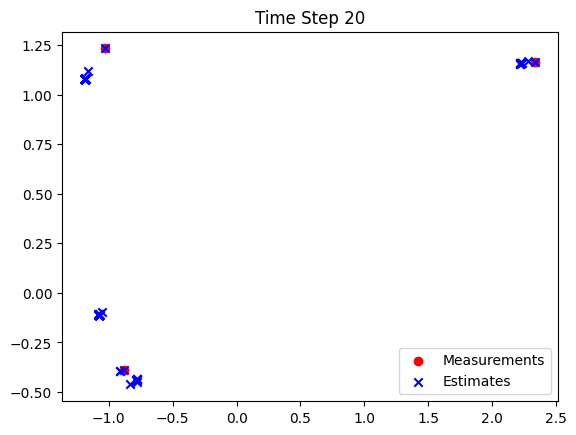

In [3]:
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt

#  Helper functions
def create_synthetic_data(num_targets, num_steps, noise_cov):
    """Generate synthetic time series data for multiple targets."""
    targets = []
    for _ in range(num_targets):
        x0 = np.random.randn(2)
        target = [x0]
        for _ in range(1, num_steps):
            x_prev = target[-1]
            x_new = x_prev + np.random.randn(2) * np.sqrt(noise_cov[0, 0])
            target.append(x_new)
        targets.append(np.array(target))
    return np.array(targets)

def gaussian_mixture_posterior(means, covariances, weights):
    """Approximate posterior as a mixture of Gaussians."""
    def posterior(x):
        return sum(w * multivariate_normal(mean=m, cov=c).pdf(x)
                   for m, c, w in zip(means, covariances, weights))
    return posterior

def update_phd(means, covariances, weights, measurements, R, birth_weight=0.01):
    """Update step of GM-PHD filter."""
    new_means = []
    new_covariances = []
    new_weights = []
    
 #     Update existing components
    for i in range(len(weights)):
        mean = means[i]
        cov = covariances[i] + R
        for z in measurements:
            K = cov @ np.linalg.inv(cov + R)
            mean_new = mean + K @ (z - mean)
            cov_new = (np.eye(len(mean)) - K) @ cov
            weight_new = weights[i] * multivariate_normal(mean=mean, cov=cov).pdf(z)
            
            new_means.append(mean_new)
            new_covariances.append(cov_new)
            new_weights.append(weight_new)
    
   #   Add birth components (new targets)
    for z in measurements:
        new_means.append(z)
        new_covariances.append(R)
        new_weights.append(birth_weight)
    
   #   Normalize weights
    new_weights = np.array(new_weights)
    new_weights /= np.sum(new_weights)
    
    return np.array(new_means), np.array(new_covariances), new_weights

def prune(means, covariances, weights, weight_threshold=1e-3, max_components=100):
    """Prune and merge components in the GM-PHD filter."""
    indices = np.where(weights > weight_threshold)[0]
    means = means[indices]
    covariances = covariances[indices]
    weights = weights[indices]
    
    if len(weights) > max_components:
        indices = np.argsort(weights)[-max_components:]
        means = means[indices]
        covariances = covariances[indices]
        weights = weights[indices]
    
    return means, covariances, weights

#  Parameters
num_targets = 3
num_steps = 20
noise_cov = np.array([[0.1, 0], [0, 0.1]])
R = np.array([[0.1, 0], [0, 0.1]])

#  Generate synthetic data
synthetic_data = create_synthetic_data(num_targets, num_steps, noise_cov)

#  Initialize GM-PHD components
means = [np.random.randn(2)]
covariances = [np.eye(2)]
weights = [1.0]

#  Run GM-PHD filter over time series
for t in range(num_steps):
 #     Simulate measurements (with noise)
    measurements = synthetic_data[:, t] + np.random.randn(num_targets, 2) * np.sqrt(noise_cov[0, 0])
    
  #    Predict (for simplicity, assume constant velocity model)
    means = [m for m in means]
    covariances = [c + noise_cov for c in covariances]
    
   #   Update
    means, covariances, weights = update_phd(means, covariances, weights, measurements, R)
    
    #  Prune and merge components
    means, covariances, weights = prune(means, covariances, weights)
    
    #  Visualize current state
    plt.scatter(measurements[:, 0], measurements[:, 1], c='red', label='Measurements')
    plt.scatter([m[0] for m in means], [m[1] for m in means], c='blue', marker='x', label='Estimates')
    plt.legend()
    plt.title(f'Time Step {t+1}')
    plt.show()